<a href="https://colab.research.google.com/github/marco-prado/ep2-inteligencia-artificial/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Survival of Heart Failure Patients Using Decision Trees and Neural Networks**
##### Our goal is to compare the Decision Tree and Multilayer Perceptron approaches for classification by varying some of their parameters and using metrics such as accuracy, recall and mean squared error for performance evaluation.
##### - Data available in https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
##### - Developed by Marco Aurélio Prado and Silas Lima e Silva


# **Dependency Installation and Import**

In [177]:
pip install ucimlrepo

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from ucimlrepo import fetch_ucirepo

# **Data Import and Preparation**

In [179]:
# Dataset import
heart_failure_clinical_records = fetch_ucirepo(id=519)

# Splitting data into pandas dataframes
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

In [180]:
# Checking the first rows in the dataset
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [181]:
# Generating descriptive statistics
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [182]:
# Scaling the numerical features
sc = StandardScaler()
columns_to_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X_scaled = X.copy()
X_scaled.loc[:, columns_to_scale] = sc.fit_transform(X.loc[:, columns_to_scale].copy())

# Splitting the dataset into train(70%)/test(30%) subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)
X_train, X_test = X_train.values, X_test.values
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

# **Decision Tree Classifier**

In [183]:
# Parameters to be varied
criterion_list = ["gini", "entropy", "log_loss"]
max_depth_range = range(1, 15)

In [184]:
score_dict = {} # Results dictionary
for criterion in criterion_list: # Looping through the different criterion options
  score_dict[criterion] = {
      'accuracy': [],
      'recall': [],
      'mean_squared_error': [],
  }
  for max_depth in max_depth_range:

    # Initializing the DecisionTreeClassifier
    model = DecisionTreeClassifier(random_state = 1, criterion = criterion, max_depth = max_depth)

    # Fitting the training data
    model.fit(X_train, y_train)

    # Predicting values for the test subset
    y_pred_decision_tree = model.predict(X_test)

    # Calculating metrics
    score_dict[criterion]['accuracy'].append(accuracy_score(y_test, y_pred_decision_tree))
    score_dict[criterion]['recall'].append(recall_score(y_test, y_pred_decision_tree))
    score_dict[criterion]['mean_squared_error'].append(mean_squared_error(y_test, y_pred_decision_tree))

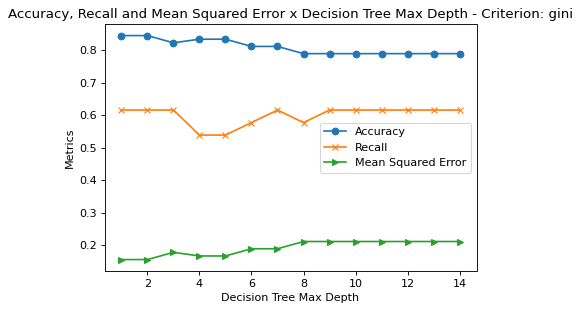

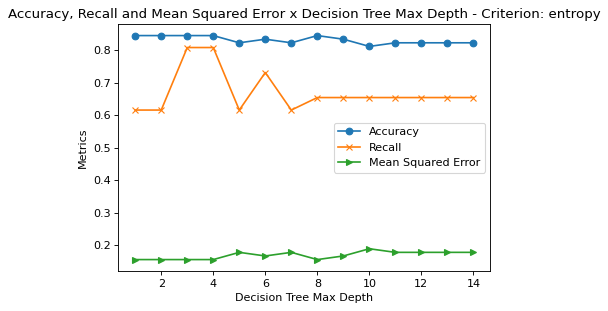

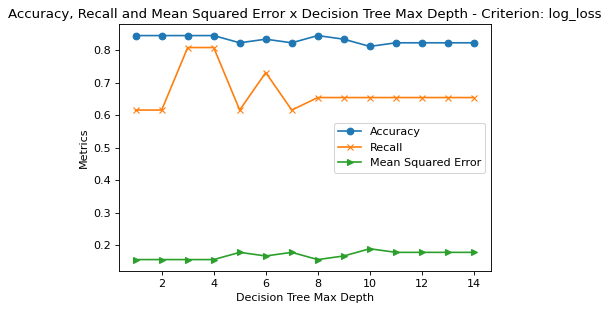

In [185]:
# Plotting the results
for criterion in criterion_list:
  plt.figure(figsize=(6, 4), dpi=80)
  plt.plot(max_depth_range, score_dict[criterion]['accuracy'], label='Accuracy', marker='o')
  plt.plot(max_depth_range, score_dict[criterion]['recall'], label='Recall', marker='x')
  plt.plot(max_depth_range, score_dict[criterion]['mean_squared_error'], label='Mean Squared Error', marker='>')
  plt.xlabel('Decision Tree Max Depth')
  plt.ylabel('Metrics')
  plt.legend()
  plt.title('Accuracy, Recall and Mean Squared Error x Decision Tree Max Depth - Criterion: ' + criterion)
  plt.show()
  print("")

# **Neural Network Classifier**

In [186]:
# Parameters to be varied
solver_list = ["lbfgs", "sgd", "adam"]
hidden_layer_size_range = range(1, 26) # max = 25 (2n+1)

In [187]:
score_dict = {} # Results dictionary
for solver in solver_list: # Looping through the different solver options
  score_dict[solver] = {
      'accuracy': [],
      'recall': [],
      'mean_squared_error': [],
  }
  for hidden_layer_size in hidden_layer_size_range:

    # Initializing the MLPClassifier
    neural_network_classifier = MLPClassifier(hidden_layer_sizes=(hidden_layer_size), activation = "relu", max_iter=2000, random_state=1, learning_rate_init=0.0002, learning_rate='adaptive')

    # Fitting the training data
    neural_network_classifier.fit(X_train, y_train)

    # Predicting values for the test subset
    y_pred_neural_network = neural_network_classifier.predict(X_test)

    # Calculating metrics
    score_dict[solver]['accuracy'].append(accuracy_score(y_test, y_pred_neural_network))
    score_dict[solver]['recall'].append(recall_score(y_test, y_pred_neural_network))
    score_dict[solver]['mean_squared_error'].append(mean_squared_error(y_test, y_pred_neural_network))

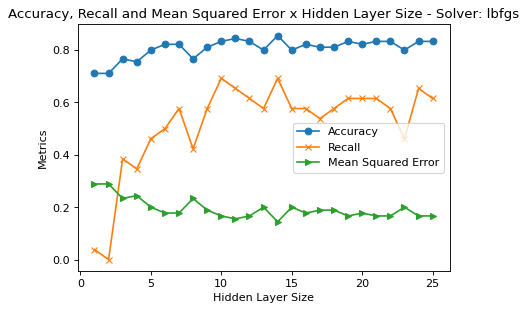

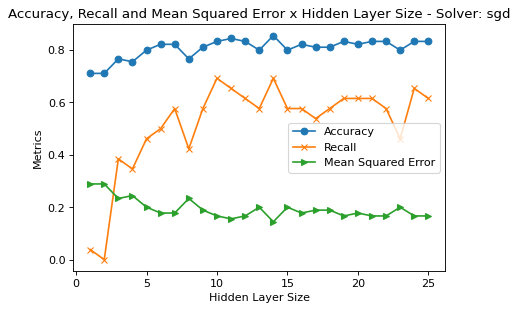

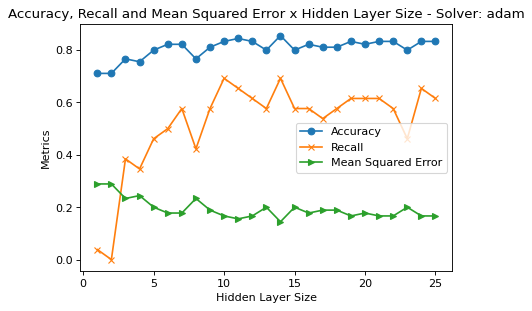

In [188]:
# Plotting the results
for solver in solver_list:
  plt.figure(figsize=(6, 4), dpi=80)
  plt.plot(hidden_layer_size_range, score_dict[solver]['accuracy'], label='Accuracy', marker='o')
  plt.plot(hidden_layer_size_range, score_dict[solver]['recall'], label='Recall', marker='x')
  plt.plot(hidden_layer_size_range, score_dict[solver]['mean_squared_error'], label='Mean Squared Error', marker='>')
  plt.xlabel('Hidden Layer Size')
  plt.ylabel('Metrics')
  plt.legend()
  plt.title('Accuracy, Recall and Mean Squared Error x Hidden Layer Size - Solver: ' + solver)
  plt.show()
  print("")